In [1]:
class Ad:
    def __init__(self):
        self.N = 0
        self.R = []
        self.TR = 0
        self.AR = 0
        self.UCB = 1e400
        
    def reward(self , rew, n):
        from math import sqrt ,  log10
        self.N +=1
        self.R.append(rew)
        self.TR +=rew
        self.AR = self.TR/self.N
        try:
            self.UCB = self.AR + sqrt(1.5*log10(n)/self.N)
        except:
            pass
        
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("Ads_CTR_Optimisation.csv")
Data = np.matrix(dataset)

a,b = Data.shape

ADS = [Ad(),Ad(),Ad(),Ad(),Ad(),Ad(),Ad(),Ad(),Ad(),Ad()]

In [3]:
def opt_selector(ADS):
    import random
    UCB = []
    k=0
    for i in ADS:
        UCB.append((i.UCB,k))
        k+=1
    
    UCB.sort()
    t = []
    for i in range(10):
        if UCB[i][0] == UCB[9][0]:
            t.append(UCB[i][1])
        
    t.sort()
   
    return random.randint(t[0] , t[-1])

In [4]:
TotalRew=0
L=[]
for i in range(a):
    
    if i<10:
        k = i
        
    else:
    
        k = opt_selector(ADS)
    L.append(k)
   
    
    rew = Data[i,k]
    ADS[k].reward(rew,i+1)
    TotalRew+=rew

(array([ 266.,  171.,  115.,  161., 8178.,   87.,  156.,  636.,  132.,
          98.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

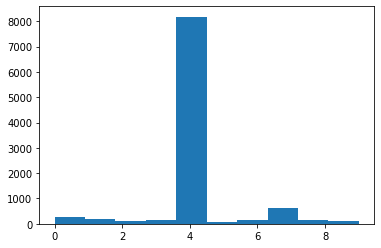

In [5]:
plt.hist(L)

In [7]:
print("Total Number of AD clicks : " + str(TotalRew) + "/10000")

Total Number of AD clicks : 2468/10000
